In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importação das Bibliotecas

In [ ]:
import torchvision
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
import h5py
import numpy as np
from PIL import Image
import os
import time

- **torchvision**: Um pacote que fornece conjuntos de dados, arquiteturas de modelos e transformações de imagem para uso com o PyTorch. Facilita o trabalho com dados de visão computacional.

- **torch.utils.data.DataLoader**: Um utilitário para carregar dados em lotes (mini-batches) durante o treinamento de modelos. Ele lida com a iteração eficiente e aleatória sobre os dados, além de suportar a paralelização.

- **albumentations**: Uma biblioteca popular para aumentar (augment) imagens de maneira eficiente e flexível. Contém uma variedade de transformações como rotações, redimensionamento, cortes, etc., para aumentar a diversidade do dataset durante o treinamento.

- **albumentations.pytorch.ToTensorV2**: Converte uma imagem (ou uma sequência de imagens) para um tensor do PyTorch, necessário para o treinamento de modelos.

- **tqdm**: Uma biblioteca que fornece barras de progresso durante loops. É útil para visualizar o progresso de operações demoradas, como o treinamento de modelos.

- **torch.nn as nn**: O módulo torch.nn contém classes e funções para construir redes neurais em PyTorch. Inclui camadas, funções de perda, ativação, etc.

- **torch.optim as optim**: Fornece otimizadores que ajustam os parâmetros do modelo durante o treinamento, como SGD, Adam, e outros.

- **os**: Utilizado para interagir com o sistema de arquivos, como navegação em diretórios e manipulação de caminhos de arquivos.

- **PIL.Image**: PIL (Python Imaging Library) é usada para abrir, manipular e salvar imagens. Image é a classe principal para trabalhar com imagens.

- **torch.utils.data.Dataset**: Uma classe base para criar novos conjuntos de dados personalizados para PyTorch. É geralmente usada em conjunto com DataLoader para carregar dados de forma eficiente.

- **numpy as np**: Uma biblioteca fundamental para computação científica em Python, usada para trabalhar com arrays multidimensionais e realizar operações matemáticas e lógicas sobre grandes volumes de dados.

- **torch**: A biblioteca principal do PyTorch para criar e treinar modelos de aprendizado profundo.

- **torchvision.transforms.functional as TF**: Fornece funções úteis para realizar transformações de imagem, como redimensionamento, corte, normalização, etc., diretamente em tensores.

- **h5py**: Uma biblioteca para interagir com arquivos HDF5, que são frequentemente usados para armazenar grandes volumes de dados estruturados, como os pesos de redes neurais.

- **os** (repetido): Como mencionado, é utilizado para interação com o sistema de arquivos.


## Definição dos Caminhos das Pastas

In [ ]:
# Defina o caminho das pastas onde as imagens serão salvas
save_dir_x = '/content/images_x/'
save_dir_y = '/content/images_y/'

### Criação das Pastas de Destino

In [ ]:
os.makedirs(save_dir_x, exist_ok=True)
os.makedirs(save_dir_y, exist_ok=True)

- **os.makedirs(...)**: Cria as pastas de destino para armazenar os frames organizados. Se as pastas já existirem, o código pode lançar um erro, mas como esta é a primeira execução, presume-se que as pastas ainda não existem.

In [ ]:
with h5py.File('/content/drive/MyDrive/data/combined_data.h5', 'r') as f:

    group_x = f['X']
    group_y = f['Y']


    for i in range(group_x.shape[0]):
        data_x = np.array(group_x[i])
        img_x = Image.fromarray(data_x)
        img_path_x = os.path.join(save_dir_x, f'image_x_{i}.png')
        img_x.save(img_path_x)
        print(f'Imagem X {i} salva em: {img_path_x}')


    for i in range(group_y.shape[0]):
        data_y = np.array(group_y[i])
        img_y = Image.fromarray(data_y)
        img_path_y = os.path.join(save_dir_y, f'image_x_{i}.png')
        img_y.save(img_path_y)
        print(f'Imagem Y {i} salva em: {img_path_y}')

- **os.makedirs(save_dir_x, exist_ok=True) e os.makedirs(save_dir_y, exist_ok=True)**: Essas linhas garantem que as pastas onde as imagens serão salvas existam. Se as pastas não existirem, elas serão criadas automaticamente. O argumento exist_ok=True evita que ocorra um erro caso a pasta já exista.

- **with h5py.File('/content/drive/MyDrive/data/combined_data.h5', 'r') as f:**: Essa linha abre o arquivo .h5 em modo de leitura ('r'). O uso do bloco with garante que o arquivo seja corretamente fechado após a leitura, mesmo que ocorra algum erro durante a execução do código.

- **group_x = f['X'] e group_y = f['Y']**: Aqui, estamos acessando os grupos de dados chamados 'X' e 'Y' dentro do arquivo .h5. Esses grupos são equivalentes a diretórios dentro do arquivo HDF5, onde cada grupo contém dados (neste caso, imagens) organizados em formato de array.

- **for i in range(group_x.shape[0]):**: Inicia um loop que itera sobre cada item no grupo 'X'. O group_x.shape[0] retorna o número total de imagens no grupo 'X', permitindo que o loop itere sobre cada uma delas.

- **data_x = np.array(group_x[i])**: Converte o i-ésimo item do grupo 'X' em um array NumPy. Cada item em group_x é originalmente armazenado como um dataset HDF5, então é necessário convertê-lo para um array NumPy para manipulação posterior.

- **img_x = Image.fromarray(data_x)**: Converte o array NumPy em uma imagem PIL. A biblioteca PIL é usada para abrir, manipular e salvar imagens em Python.

- **img_path_x = os.path.join(save_dir_x, f'image_x_{i}.png')**: Cria o caminho completo para salvar a imagem X, combinando o diretório de destino (save_dir_x) com o nome do arquivo (image_x_{i}.png). O f-string é usado para inserir o índice i no nome do arquivo, garantindo que cada imagem tenha um nome único.

- **img_x.save(img_path_x)**: Salva a imagem X no caminho especificado (img_path_x).

- **print(f'Imagem X {i} salva em: {img_path_x}')**: Exibe uma mensagem de confirmação no console, informando que a imagem X foi salva com sucesso no caminho especificado.

- **Repetição do processo para o grupo 'Y'**: O código para o grupo 'Y' segue o mesmo padrão que para o grupo 'X'. Ele converte cada item do grupo 'Y' em uma imagem, cria o caminho de salvamento correspondente e salva a imagem na pasta designada.

- **img_path_y = os.path.join(save_dir_y, f'image_x_{i}.png')**: Note que eu coloco o mesmos nome do arquivo para as imagens Y usando image_x_{i}.png em vez de image_y_{i}.png. Isso e para que quando eu for fazer o treinamento dos arquivos eu não precise fazer um replace para apontar qual imagem Y se refere a X



### Definição da Classe DoubleConv

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_prob=0.1):
        super(DoubleConv,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_prob),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_prob)
        )

    def forward(self,x):
        return self.conv(x)

**in_channels**: O número de canais de entrada (por exemplo, 3 para imagens RGB).

**out_channels**: O número de canais de saída após as convoluções.

**dropout_prob=0.1**: Define a probabilidade de desligamento de neurônios durante o treinamento para evitar overfitting.

**super(DoubleConv, self).__init__()**: Chama o construtor da superclasse (nn.Module) para garantir que a classe seja corretamente inicializada.

Atributo **self.conv** define uma sequência de camadas  que será aplicada aos dados de entrada.

**nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)**:
Aplica uma convolução aos dados de entrada com um kernel(mascara) de 3x3.

**padding=1**: Adiciona um padding de 1 ao redor da entrada para manter as dimensões da imagem após a convolução.

**nn.Dropout(p=dropout_prob)**: Aplica dropout para regularização, desligando neurônios com probabilidade dropout_prob.

**nn.BatchNorm2d(out_channels)**: Aplica normalização em batch após a convolução para estabilizar a aprendizagem e acelerar a convergência.

**nn.ReLU(inplace=True)**: Aplica a função de ativação ReLU, que introduz não linearidade ao modelo, substituindo todos os valores negativos por zero.

Método **forward** define como os dados de entrada percorrem as camadas na rede.

### Definição da Classe CarvanaDataset

In [ ]:
class CarvanaDataset(Dataset):
  def __init__(self, image_dir, mask_dir, transform=None):
    self.image_dir = image_dir
    self.mask_dir = mask_dir
    self.transform = transform
    self.images = os.listdir(image_dir)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    img_path = os.path.join(self.image_dir, self.images[index])
    mask_path = os.path.join(self.mask_dir,self.images[index])
    image = np.array(Image.open(img_path))
    mask = np.array(Image.open(mask_path).convert('L'),dtype=np.float32)
    mask[mask == 225] = 1  # Cabeça em branco
    if self.transform is not None:
      argumentation = self.transform(image = image, mask=mask)
      image = argumentation["image"]
      mask = argumentation["mask"]
    return image,mask

- **__init__(self, image_dir, mask_dir, transform=None)** : Método construtor que inicializa os diretórios de imagens e máscaras, bem como uma lista de todas as imagens no diretório especificado.

- **image_dir** : Caminho para o diretório contendo as imagens.

- **mask_dir** : Caminho para o diretório contendo as máscaras de segmentação.

- **transform** : Transformações opcionais a serem aplicadas às imagens e máscaras, como augmentations.

- **self.images = os.listdir(image_dir)** : Lista todos os arquivos de imagem no diretório image_dir e armazena os nomes em **self.images**.

- **def __len__(self)** :Método que retorna o número total de imagens no dataset. Isso é necessário para que o PyTorch saiba o tamanho do dataset ao iterar sobre ele.


- **def __getitem__(self, index)** : Método que carrega e retorna uma imagem e sua máscara correspondente com base no índice fornecido.

- **img_path** :
Constrói o caminho completo para a i-ésima imagem no dataset.
- **mask_path** :
Constrói o caminho completo para a máscara correspondente à i-ésima imagem.

- **image** :
Abre a imagem usando o PIL e a converte para um array NumPy.

- **mask** :
Abre a máscara correspondente e a converte para um array NumPy, convertendo-a para tons de cinza com o modo 'L'. A conversão é feita para facilitar a manipulação dos valores dos pixels.

- **mask[mask == 225] = 1** : Ajusta os valores da máscara. Neste exemplo, os pixels com valor 225 são redefinidos para 1

- **argumentation** : Aplica as transformações à imagem e à máscara.

- **image** e **mask** :
Recupera a imagem e a máscara transformadas.


### Definição da Classe UNET

In [ ]:
class UNET(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128,256,512], dropout_prob=0.1):

        super(UNET, self).__init__()

        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)

        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature, dropout_prob))
            in_channels = feature

        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2,
                    feature,
                    kernel_size=2,
                    stride=2)),
            self.ups.append(DoubleConv(feature*2, feature, dropout_prob))
        self.bottleneck = DoubleConv(features[-1],features[-1]*2, dropout_prob)
        self.final_conv = nn.Conv2d(features[0], out_channels,kernel_size=1)

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for index in range (0, len(self.ups), 2):
            x = self.ups[index](x)
            skip_connection = skip_connections[index//2]

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection,x),dim=1)
            x = self.ups[index+1](concat_skip)


        return self.final_conv(x)

- **__init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512], dropout_prob=0.1)**: Método construtor que define a estrutura da rede.

- **in_channels**: O número de canais de entrada aqui estamos usando 3 para imagens RGB.

- **out_channels**: O número de canais de saída aqui estamos usando 1 para máscaras de segmentação binária.

- **features**: Lista de filtros usados nas camadas convolucionais. Estes determinam a profundidade das feature maps em cada camada.

- **dropout_prob=0.1**: Probabilidade de dropout para regularizar e evitar overfitting.

- **downs**: Lista de módulos que representam o caminho de descida.

- **ups**: Lista de módulos que representam o caminho de subida.

- **self.pool = nn.MaxPool2d(kernel_size=2, stride=2)**: A operação de MaxPooling 2D é usada para reduzir as dimensões espaciais das feature maps pela metade.

- Camadas de **Downsampling**: Para cada valor em features, adiciona uma camada dupla na lista **downs**. O número de canais de entrada é atualizado para o número de filtros após cada iteração.

- Camadas de **Upsampling**: As camadas de Upsampling usam ConvTranspose2d para aumentar a dimensão das feature maps. Em seguida, cada camada é seguida por outra camada convolucional dupla (DoubleConv).

- **self.bottleneck**: Define a camada intermediária da U-Net, onde a maior parte do processamento ocorre.

- **self.final_conv**: Uma convolução final que reduz os canais de saída.

- **skip_connections** : Lista que armazena as conexões de salto, que são usadas para concatenar os mapas de características durante a fase de upsampling.

- Para cada camada em **downs**, a entrada passa por convoluções e pooling, e os resultados são armazenados em **skip_connections**.

- **Bottleneck** : A entrada processada passa pela camada de bottleneck.

- As conexões de salto são usadas aqui para concatenar os mapas de características da descida com as características da subida.

- **x = TF.resize(x, size=skip_connection.shape[2:])** : Ajusta o tamanho dos mapas de características para garantir que possam ser concatenados corretamente.

- **torch.cat((skip_connection, x), dim=1)** : Concatena as características da conexão de salto com as características de subida.

### Funções para Checkpoints e Loaders

In [ ]:
def seve_checkpoint(state,filename="my_checkpoint.pth.tar"):
  print("=> Saving checkpoint")
  torch.save(state, filename)

def load_checkpoint(checkpoint,model):
  print("=> Loading checkpoint")
  model.load_state_dict(checkpoint["state_dict"])

def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True
):
  train_ds = CarvanaDataset(
      image_dir=train_dir,
      mask_dir=train_maskdir, #y
      transform=train_transform,
  )
  train_loader = DataLoader(
      train_ds,
      batch_size=batch_size,
      num_workers = num_workers,
      pin_memory = pin_memory,
      shuffle = True
  )
  val_ds = CarvanaDataset(
      image_dir=val_dir,
      mask_dir=val_maskdir,
      transform=val_transform,
  )

  val_loader = DataLoader(
    val_ds,
    batch_size=batch_size,
    num_workers = num_workers,
    pin_memory = pin_memory,
    shuffle = False
  )
  return train_loader,val_loader

def check_accuracy(loader, model, device = "cuda"):
  num_correct = 0
  num_pixels = 0
  dice_score =0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)
      preds = torch.sigmoid(model(x))
      preds = (preds > 0.5).float()
      num_correct += (preds ==y).sum()
      num_pixels += torch.numel(preds)
      dice_score +=(2*(preds*y).sum()/((preds+y).sum()+1e-8))
  print(
      f"Tivemos {num_correct}/{num_pixels} com acurácia {num_correct/num_pixels*100:.2f}"
  )
  print(f"Dice score: {dice_score/len(loader)}")
  model.train()


def save_predictions_as_imgs(
    loader, model, folder="/content/saved_image", device="cuda"
):
    model.eval()
    for index, (x, y) in enumerate(loader):
        print(index)
        x = x.to(device=device)
        with torch.no_grad():
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()

        x = x.cpu().numpy()
        y = y.cpu().numpy()
        preds = preds.cpu().numpy()


        x = (x - x.min()) / (x.max() - x.min())
        y = (y - y.min()) / (y.max() - y.min())
        preds = (preds - preds.min()) / (preds.max() - preds.min())


        x_img = Image.fromarray((x[0] * 255).astype(np.uint8).transpose(1, 2, 0))
        y_img = Image.fromarray((y[0] * 255).astype(np.uint8).squeeze())
        preds_img = Image.fromarray((preds[0] * 255).astype(np.uint8).squeeze())


        combined_img = Image.new('RGB', (x_img.width + y_img.width + preds_img.width, x_img.height))
        combined_img.paste(x_img, (0, 0))
        combined_img.paste(y_img.convert('RGB'), (x_img.width, 0))
        combined_img.paste(preds_img.convert('RGB'), (x_img.width + y_img.width, 0))

        combined_img.save(f"{folder}/combined_{index}.png")

        print("Saved combined image")

    model.train()

- **save_checkpoint(state, filename="my_checkpoint.pth.tar")**: Salva o estado atual do modelo em um arquivo para permitir a retomada do treinamento a partir desse ponto.

- **torch.save(state, filename)** : Utiliza a função torch.save para salvar o estado fornecido no arquivo especificado.

- **my_checkpoint.pth.tar**: contém o checkpoint é salvo no disco.

- **load_checkpoint(checkpoint, model)** : Carrega o estado salvo de um modelo a partir do checkpoint e restaura o modelo ao estado salvo.
- **model.load_state_dict(checkpoint["state_dict"])** : Carrega o dicionário de estados salvo no modelo.

- **get_loaders(train_dir, train_maskdir, val_dir, val_maskdir, batch_size, train_transform, val_transform, num_workers=4, pin_memory=True)** : Cria e retorna os para os datasets de treinamento e validação.
- **train_dir**: Diretório das imagens de treinamento.
- **train_maskdir**: Diretório das máscaras de treinamento.
- **val_dir**: Diretório das imagens de validação.
- **val_maskdir**: Diretório das máscaras de validação.
- **batch_size**: Tamanho do lote de dados.
- **train_transform**: Transformações aplicadas ao dataset de treinamento.
- **val_transform**: Transformações aplicadas ao dataset de validação.
- **num_workers**: Número de threads a serem usadas na leitura dos dados.
- **pin_memory**: Se True, os dados são copiados para a memória da GPU.


- **check_accuracy(loader, model, device="cuda")** : Avalia a precisão e o Dice Score do modelo nos dados fornecidos pelo loader.

- **loader**: Carregador de dados para avaliar a precisão.
- **model**: O modelo de rede neural a ser avaliado.
- **device**: O dispositivo (cuda ou cpu) no qual a       avaliação será realizada.

- **num_correct**: Número de previsões corretas.
- **num_pixels**: Número total de pixels avaliados.
- **dice_score**: O Dice Score médio calculado no loader.

- save_predictions_as_imgs(loader, model, folder="/content/saved_image", device="cuda") : Salva as previsões do modelo como imagens no diretório.

- **loader**: Carregador de dados para gerar as previsões.
- **model**: O modelo de rede neural para gerar as previsões.
- **folder**: Diretório onde as imagens salvas serão armazenadas.
- **device**: O dispositivo (cuda ou cpu) no qual a avaliação será realizada.


- **x = x.to(device=device)**: Move os dados de entrada para o dispositivo especificado.
- **preds = torch.sigmoid(model(x))**: Gera previsões usando a função de ativação Sigmoid.
- **preds = (preds > 0.5).float()**: Converte as previsões para uma máscara binária.
- **x = (x - x.min()) / (x.max() - x.min())**: Normaliza a imagem original.
- **combined_img.save(f"{folder}/combined_{index}.png")**: Salva a imagem combinada no diretório especificado.


### Função de Perda

#### Dice Loss

In [ ]:
import tensorflow as tf

# Define the Dice Loss function
@tf.keras.utils.register_keras_serializable()
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)

    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice


#### Jaccard Loss

In [ ]:

@tf.keras.utils.register_keras_serializable()
def jaccard_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    sum_ = tf.reduce_sum(y_true + y_pred)
    jac = (intersection + 1e-15) / (sum_ - intersection + 1e-15)

    return 1 - jac


#### Cross Entopy

In [ ]:

@tf.keras.utils.register_keras_serializable()
def cross_entropy_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_mean(loss)


### Funções de Treinamento e Avaliação

In [ ]:
LEARN_RATE =3e-4
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
BATCH_SIZE = 40
NUM_EPOCHS = 16
NUM_WORKERS = 200
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "/content/images_x"
TRAIN_MASK_DIR = "/content/images_y"
VAL_IMG_DIR ="/content/images_x"
VAL_MASK_DIR ="/content/images_y"

class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_fn(loader, model, optimizer, loss_fn, scaler):
  loop = tqdm(loader)
  for batch_index, (data,targets) in enumerate(loop):
    data = data.to(device=DEVICE)
    targets = targets.float().unsqueeze(1).to(device=DEVICE)

  with torch.cuda.amp.autocast():
    predictions = model(data)
    loss = loss_fn(predictions, targets)

  optimizer.zero_grad()
  scaler.scale(loss).backward()
  scaler.step(optimizer)
  scaler.update()

  loop.set_postfix(loss=loss.item())

def main():
  train_transform = A.Compose(
        [
          A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
          A.Rotate(limit=35,p=1.0),
          A.HorizontalFlip(p=0.5),
          A.VerticalFlip(p=0.1),
          A.Normalize(
              mean=[0.0,0.0,0.0],
              srd=[1.0,1.0,1.0],
              max_pixel_value=255.0
          ),
          ToTensorV2()
        ])

  val_transform = A.Compose(
        [
          A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
          A.Normalize(
              mean=[0.0,0.0,0.0],
              srd=[1.0,1.0,1.0],
              max_pixel_value=255.0
          ),
          ToTensorV2()
        ])
  model = UNET(in_channels=3,out_channels=1).to(DEVICE)
  l1_lambda = 1e-5
  l2_lambda = 1e-4
  loss_fn = nn.BCEWithLogitsLoss()
  loss_fn_dice = jaccard_loss
  loss_fn_cross = cross_entropy_loss
  loss_fn_jaccard = dice_loss
  optimizer = optim.Adam(model.parameters(), lr=LEARN_RATE)
  train_loader, val_loader = get_loaders(
      TRAIN_IMG_DIR,
      TRAIN_MASK_DIR,
      VAL_IMG_DIR,
      VAL_MASK_DIR,
      BATCH_SIZE,
      train_transform,
      val_transform,
      NUM_WORKERS,
      PIN_MEMORY

  )
  scaler = torch.cuda.amp.GradScaler()
  early_stopping = EarlyStopping(patience=150)
  inicio = time.time()
  for epoch in range(NUM_EPOCHS):
    train_fn(train_loader,model,optimizer,loss_fn,scaler)

    val_loss = check_accuracy(val_loader, model, device=DEVICE)

    early_stopping(val_loss)
    if early_stopping.early_stop:
      print("Early stopping triggered")
      break

    checkpoint = {
        "state_dict":model.state_dict(),
        "optimizer":optimizer.state_dict()
    }
    seve_checkpoint(checkpoint)

    save_predictions_as_imgs(val_loader,model,device=DEVICE)
  fim = time.time()
  print(f"Tempo de treinamento: {fim-inicio}")

if __name__ =="__main__":
  main()

- EarlyStopping: Classe responsável por monitorar a perda de validação durante o treinamento e interromper o processo se a perda não melhorar após um número definido de épocas (patience). Ajuda a evitar o overfitting e economizar tempo de treinamento.
- **patience**: Número de épocas que o treinamento irá continuar sem melhora antes de acionar o early stopping.
- **min_delta**: Valor mínimo de melhora na perda necessário para resetar o contador de paciência.
- **counter**: Contador que rastreia quantas épocas consecutivas ocorreram sem melhora.
- **best_loss**: A melhor perda de validação observada até o momento.
- **early_stop**: Booleano que indica se o treinamento deve ser interrompido.
- train_fn(loader, model, optimizer, loss_fn, scaler) : Treina o modelo usando os dados fornecidos pelo loader, ajustando os pesos do modelo com base na função de perda loss_fn.
- **loader**: Carregador de dados para treinamento.
- **model**: O modelo de rede neural a ser treinado.
- **optimizer**: Otimizador para atualizar os pesos do modelo.
- **loss_fn**: Função de perda usada para calcular a perda entre as previsões e os alvos.
- **scaler**: Escalador de precisão mista para melhorar o desempenho de treinamento em GPUs.
- **data.to(device=DEVICE)**: Move os dados de entrada para o dispositivo (cuda ou cpu).
- **targets.float().unsqueeze(1).to(device=DEVICE)**: Move os alvos para o dispositivo e ajusta suas dimensões.
- **torch.cuda.amp.autocast()**: Contexto para computação com precisão mista.
- **predictions = model(data)**: Gera previsões do modelo para os dados fornecidos.
- **loss = loss_fn(predictions, targets)**: Calcula a perda entre as previsões e os alvos.
- **optimizer.zero_grad()**: Zera os gradientes acumulados.
- **scaler.scale(loss).backward()**: Calcula os gradientes com base na perda escalada.
- **scaler.step(optimizer)**: Atualiza os pesos do modelo.
- **scaler.update()**: Atualiza o escalador.

- main(): Função principal que configura e executa o treinamento do modelo e a avaliação.
- **train_transform**: Define as transformações a serem aplicadas às imagens de treinamento, incluindo redimensionamento, rotação, flips, normalização e conversão para tensor.
- **val_transform**: Define as transformações a serem aplicadas às imagens de validação, incluindo redimensionamento, normalização e conversão para tensor.
- **model**: Inicializa o modelo UNET e o move para o dispositivo especificado.
- **l1_lambda**: 1e-5: Fator de regularização L1 que penaliza grandes magnitudes dos pesos para promover esparsidade.
- **l2_lambda**: 1e-4: Fator de regularização L2 penaliza grandes pesos para prevenir overfitting e melhorar a generalização.
- **loss_fn**: Define a função de perda.
- **optimizer**: Inicializa o otimizador Adam.
- **train_loader, val_loader**: Obtém os carregadores de dados de treinamento e validação usando a função get_loaders.
- **scaler**: Inicializa o escalador de precisão mista.
- **early_stopping**:EarlyStopping(patience=150): Configura a parada antecipada para interromper treinamento se a perda não melhorar após 150 épocas.
- **for epoch in range(NUM_EPOCHS)**: Loop de treinamento para o número especificado de épocas.
- **train_fn()**: Chama a função de treinamento para cada época.
- **checkpoint**: Cria um dicionário com o estado do modelo e do otimizador.
- **save_checkpoint()**: Salva o checkpoint do modelo.
- **check_accuracy()**: Avalia a precisão do modelo nos dados de validação.
- **save_predictions_as_imgs()**: Salva as previsões do modelo como imagens.

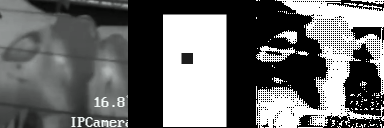

In [ ]:
Image.open("/content/saved_image/combined_44.png")

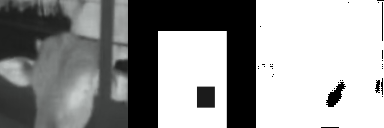

In [ ]:
Image.open("/content/saved_image/combined_63.png")

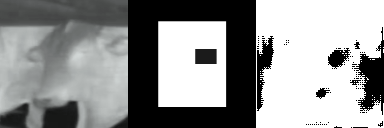

In [ ]:
Image.open("/content/saved_image/combined_111.png")

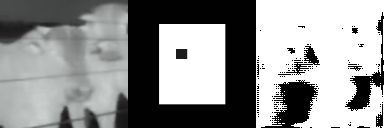

In [ ]:
Image.open("/content/saved_image/combined_151.png")